# Notebook 1: Scratchwork

## A lot of this work is scratchwork prior to doing the challenges. Please see newer notebook, titled 'MTA-brian-200703'

## Retrieving data

>Retrive the data using the below format.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

# Select weeks to aggregate data by YYMMDD format
week_nums = [200627, 200620, 200613]

In [2]:
# Define 'df' as variable for exported data
df = get_data(week_nums)

## Initial look at data; ENTRIES and EXITS are cumulative

>Below is work when we initially assumed that ENTRIES and EXITS are per 4-hr periods, which is incorrect. The work is left here for reference and viewing some sections of the data, but data cleaning is presented below.

In [3]:
# Change the title of EXITS because it has excessive spaces
df = df.rename(columns={'EXITS                                                               ':'EXITS'})

In [4]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,7424218,2522558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,04:00:00,REGULAR,7424220,2522559
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,08:00:00,REGULAR,7424231,2522572
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,12:00:00,REGULAR,7424265,2522590
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,16:00:00,REGULAR,7424340,2522604
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,20:00:00,REGULAR,7424415,2522612
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,00:00:00,REGULAR,7424441,2522622
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,04:00:00,REGULAR,7424443,2522623
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,08:00:00,REGULAR,7424457,2522628
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,12:00:00,REGULAR,7424471,2522645


In [5]:
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
206652,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/11/2020,09:00:00,REGULAR,5554,514
206653,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/11/2020,13:00:00,REGULAR,5554,514
206654,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/11/2020,17:00:00,REGULAR,5554,514
206655,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/11/2020,21:00:00,REGULAR,5554,514
206656,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,01:00:00,REGULAR,5554,514
206657,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,05:00:00,REGULAR,5554,514
206658,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,09:00:00,REGULAR,5554,514
206659,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,13:00:00,REGULAR,5554,514
206660,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,17:00:00,REGULAR,5554,514
206661,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,21:00:00,REGULAR,5554,514


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# Average of all entries
df.ENTRIES.mean()

43205359.19525636

In [8]:
# Total counts of when the STATION is listed
df.STATION.value_counts()

34 ST-PENN STA     12616
FULTON ST          12093
GRD CNTRL-42 ST     9580
23 ST               9170
86 ST               7923
                   ...  
BEVERLEY ROAD        375
NORWOOD AV           374
ATLANTIC AV          370
CLEVELAND ST         252
SUTTER AV            252
Name: STATION, Length: 379, dtype: int64

In [9]:
df[df.ENTRIES > df.ENTRIES.mean()].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
924,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/20/2020,02:00:00,REGULAR,119672719,3234056
925,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/20/2020,06:00:00,REGULAR,119672720,3234056
926,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/20/2020,10:00:00,REGULAR,119672722,3234069
927,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/20/2020,14:00:00,REGULAR,119672735,3234097
928,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/20/2020,18:00:00,REGULAR,119672774,3234139
929,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/20/2020,22:00:00,REGULAR,119672812,3234152
930,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/21/2020,02:00:00,REGULAR,119672820,3234155
931,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/21/2020,06:00:00,REGULAR,119672821,3234155
932,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/21/2020,10:00:00,REGULAR,119672824,3234168
933,A007,R079,01-06-01,5 AV/59 ST,NQRW,BMT,06/21/2020,14:00:00,REGULAR,119672832,3234197


In [10]:
# There is no missing data
df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [11]:
# Aggregation of ENTRIES by STATION; could not aggregate by EXITS; detailed
df.groupby('STATION').ENTRIES.agg(['mean', 'std', 'median', 'count'])

,mean,std,median,count
STATION,,,,
1 AV,2.307557e+07,8.094204e+07,104980.0,2519
103 ST,9.000996e+06,7.210597e+06,8625196.0,1896
103 ST-CORONA,6.917390e+06,5.291068e+06,5030881.0,1134
104 ST,1.879381e+08,5.281403e+08,401215.5,1134
110 ST,6.772439e+06,3.494255e+06,5485303.0,755
...,...,...,...,...
WOODLAWN,6.463689e+06,3.127540e+06,8107492.0,630
WORLD TRADE CTR,8.897771e+07,3.617463e+08,663148.0,2268
WTC-CORTLANDT,2.111268e+07,1.218744e+08,144506.0,4401


In [12]:
# Aggregation of ENTRIES by STATION; could not aggregate by 
df.groupby('STATION')[['ENTRIES']].sum()

,ENTRIES
STATION,
1 AV,58127365579
103 ST,17065888283
103 ST-CORONA,7844320158
104 ST,213121779869
110 ST,5113191406
...,...
WOODLAWN,4072124304
WORLD TRADE CTR,201801446100
WTC-CORTLANDT,92916914006


In [13]:
# Aggregation of ENTRIES by TIME; unsuccessful
df.groupby('TIME')[['ENTRIES']].sum()

,ENTRIES
TIME,
00:00:00,2604031692254
00:00:02,506293
00:00:07,413824
00:00:10,308213
00:00:11,1
...,...
23:59:47,57316
23:59:50,1921
23:59:51,34984


## Resolving TIME columns by changing to integers data type

>From the above, we can see that there is an issue with aggregating data by time. In an effort to remedy this, adjust the time from ##:##:## format to ##.

In [14]:
# Create a lambda function to remove 6 characters from end of string
new_time = df.TIME.map(lambda x: str(x)[:-6])

df['ABBREV_TIME'] = new_time
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ABBREV_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,7424218,2522558,00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,04:00:00,REGULAR,7424220,2522559,04
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,08:00:00,REGULAR,7424231,2522572,08
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,12:00:00,REGULAR,7424265,2522590,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,16:00:00,REGULAR,7424340,2522604,16
...,...,...,...,...,...,...,...,...,...,...,...,...
206657,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,05:00:00,REGULAR,5554,514,05
206658,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,09:00:00,REGULAR,5554,514,09
206659,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,13:00:00,REGULAR,5554,514,13
206660,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/12/2020,17:00:00,REGULAR,5554,514,17


In [16]:
# Aggregation of ENTRIES and EXITS by ABBREV_TIME; it works!
df.groupby('ABBREV_TIME')[['ENTRIES','EXITS']].sum()

,ENTRIES,EXITS
ABBREV_TIME,,
00,2734797261771,2360953076281
01,1545344114618,1149912048049
02,85198410177,87269419083
03,84480122933,59585057797
04,2739778702066,2363403994156
05,1563644155027,1161804571497
06,85360532054,87369839585
07,88649188024,62190904116
08,2736657058686,2363392696498


## Cleaning data by taking difference of entries/exits

>Below we will clean the data by using "diff()" function to calculate the amount of ENTRIES and EXITS per 4-hr block.

In [17]:
# Apply difference function for both ENTRIES and EXITS

df_entries = df['ENTRIES']
df['DIFF_ENTRIES'] = df_entries.diff()

df_exits = df['EXITS']
df['DIFF_EXITS'] = df_exits.diff()

df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ABBREV_TIME,DIFF_ENTRIES,DIFF_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,7424218,2522558,00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,04:00:00,REGULAR,7424220,2522559,04,2.0,1.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,08:00:00,REGULAR,7424231,2522572,08,11.0,13.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,12:00:00,REGULAR,7424265,2522590,12,34.0,18.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,16:00:00,REGULAR,7424340,2522604,16,75.0,14.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/20/2020,20:00:00,REGULAR,7424415,2522612,20,75.0,8.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,00:00:00,REGULAR,7424441,2522622,00,26.0,10.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,04:00:00,REGULAR,7424443,2522623,04,2.0,1.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,08:00:00,REGULAR,7424457,2522628,08,14.0,5.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/21/2020,12:00:00,REGULAR,7424471,2522645,12,14.0,17.0


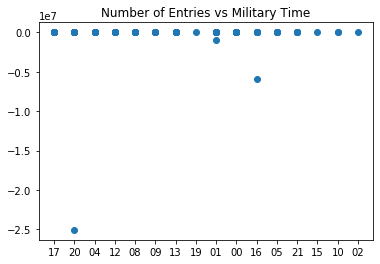

In [18]:
# Plot select data to see trends in a day

# By using ".sample() instead of .head() or .tail(), we can find some outlier values"

time_list = df['ABBREV_TIME'].sample(100)
entry_list = df['DIFF_ENTRIES'].sample(100)
exit_list = df['DIFF_ENTRIES'].sample(100)

plt.scatter(x = time_list, y = entry_list)
plt.title('Number of Entries vs Military Time');

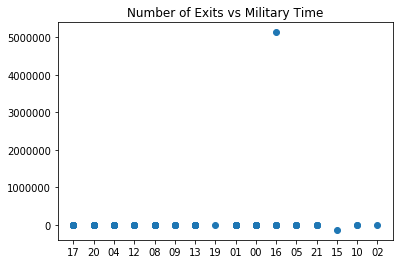

In [19]:
plt.scatter(x = time_list, y = exit_list)
plt.title('Number of Exits vs Military Time');

## Filter data due to resets

>Resets are skewing plots. Below, I will try to filter out the reset values, which should be '0'

In [54]:
mask_entry = (df.DIFF_ENTRIES > 500000)
df[mask_entry]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ABBREV_TIME,DIFF_ENTRIES,DIFF_EXITS
168,A002,R051,02-03-02,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,6549685,8741406,00,5095267.0,6481062.0
252,A002,R051,02-03-04,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,7464415,3834836,00,1405950.0,-3044689.0
294,A002,R051,02-03-05,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,11957846,1439784,00,4492124.0,-2396017.0
462,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/20/2020,02:00:00,REGULAR,4295640,7414097,02,4295640.0,7413229.0
504,A006,R079,00-00-01,5 AV/59 ST,NQRW,BMT,06/20/2020,02:00:00,REGULAR,5437194,3346872,02,1139352.0,-4070255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205948,S102,R165,00-00-00,TOMPKINSVILLE,1,SRT,06/06/2020,02:00:00,REGULAR,627011,12,02,626258.0,12.0
206242,TRAM1,R468,00-00-00,RIT-MANHATTAN,R,RIT,06/06/2020,01:00:00,REGULAR,792987,14739,01,792433.0,14739.0
206410,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,06/06/2020,01:00:00,REGULAR,589325,11771,01,588931.0,11771.0
206452,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,RIT,06/06/2020,01:00:00,REGULAR,3483055,43619,01,2890658.0,31740.0


In [55]:
mask_exit = (df.DIFF_ENTRIES < -50000)
df[mask_exit]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ABBREV_TIME,DIFF_ENTRIES,DIFF_EXITS
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,6597712,1486866,00,-828693.0,-1036569.0
84,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,1379093,5192729,00,-5220087.0,3705286.0
210,A002,R051,02-03-03,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,6057186,6877843,00,-493791.0,-1865837.0
336,A002,R051,02-03-06,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,9351051,508196,00,-2609757.0,-931943.0
378,A002,R051,02-05-00,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,524306,0,00,-8828455.0,-508292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206200,S102,R165,00-05-01,TOMPKINSVILLE,1,SRT,06/06/2020,02:00:00,REGULAR,552,0,02,-261968.0,-65536.0
206284,TRAM1,R468,00-00-01,RIT-MANHATTAN,R,RIT,06/06/2020,01:00:00,REGULAR,70470,95,01,-725368.0,-14695.0
206368,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,06/06/2020,01:00:00,REGULAR,393,0,01,-274393.0,-4696.0
206494,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,06/06/2020,01:00:00,REGULAR,752705,30598,01,-2733502.0,-13157.0


In [56]:
reset_df = pd.concat([df[mask_entry],df[mask_exit]])
reset_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ABBREV_TIME,DIFF_ENTRIES,DIFF_EXITS
168,A002,R051,02-03-02,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,6549685,8741406,00,5095267.0,6481062.0
252,A002,R051,02-03-04,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,7464415,3834836,00,1405950.0,-3044689.0
294,A002,R051,02-03-05,59 ST,NQR456W,BMT,06/20/2020,00:00:00,REGULAR,11957846,1439784,00,4492124.0,-2396017.0
462,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/20/2020,02:00:00,REGULAR,4295640,7414097,02,4295640.0,7413229.0
504,A006,R079,00-00-01,5 AV/59 ST,NQRW,BMT,06/20/2020,02:00:00,REGULAR,5437194,3346872,02,1139352.0,-4070255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206200,S102,R165,00-05-01,TOMPKINSVILLE,1,SRT,06/06/2020,02:00:00,REGULAR,552,0,02,-261968.0,-65536.0
206284,TRAM1,R468,00-00-01,RIT-MANHATTAN,R,RIT,06/06/2020,01:00:00,REGULAR,70470,95,01,-725368.0,-14695.0
206368,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,06/06/2020,01:00:00,REGULAR,393,0,01,-274393.0,-4696.0
206494,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,RIT,06/06/2020,01:00:00,REGULAR,752705,30598,01,-2733502.0,-13157.0
